**Sentiment Analysis and prediction using Naive Bayes Classification**


* details to be updated.



In [29]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import gensim.downloader as api

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pdhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


**Using pickle to get the NLP Preproccesed tweets**

In [30]:
# Loading All the tweets 

df = pd.read_pickle('source/nlp_sentiments.pkl')
df.head()

,Unnamed: 0,Date,ID,location,tweet,num_of_likes,num_of_retweet,language,cleaned_tweets,final_cleaned_tweets,sentiment_Original,sentiment_cleaned,sentiment_nlpfinal,vader_polarity
0,0,2022-11-07 23:59:59+00:00,1589769667765469186,"California, USA",Taking into account personal contributions &am...,2,1,en,taking account personal bad everyone better tr...,taking account personal bad everyone better tr...,positive,positive,positive,"{'neg': 0.271, 'neu': 0.403, 'pos': 0.326, 'co..."
1,1,2022-11-07 23:59:59+00:00,1589769667652235267,@jlo follows ♡ 01.29.21,whats your fav song?\n\n❥ I’m voting #Jennifer...,0,10,en,whats song voting,whats song voting,positive,neutral,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2,2022-11-07 23:59:59+00:00,1589769667127934977,Unknown,@MayoIsSpicyy He is allowed to speak his opini...,0,0,en,speak opinion like rest us opinion vote republ...,speak opinion like rest u opinion vote republi...,negative,positive,positive,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
3,3,2022-11-07 23:59:59+00:00,1589769666918244352,USA,HEY NY DISTRICT 10! PLEASE VOTE FOR @danielsgo...,1,1,en,hey district please vote,hey district please vote,positive,positive,positive,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp..."
4,4,2022-11-07 23:59:59+00:00,1589769666679144448,DMV,@YDanasmithdutra @BaddCompani @politicalblond ...,3,0,en,vote blue matter,vote blue matter,negative,neutral,neutral,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


**Preparing for NB**

**CountVectorizer** creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample how many times given words were found in the document.

#sparse matrix

#document[0]	0	0	0	1	1	0	0	1	0	1	0	1

#document[1]	0	0	1	0	2	0	1	0	0	0	0	1

#document[2]	1	1	0	1	1	1	0	1	1	0	1	0

In [38]:
#Initializing lists to be used in plotting later.
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [39]:
def naivebayesCV():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        cv = CountVectorizer(stop_words='english',ngram_range = (n,n), tokenizer = token.tokenize)
        text_counts = cv.fit_transform(df['final_cleaned_tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['sentiment_nlpfinal'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(Y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(Y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(Y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(Y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        # print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        # print(confusion_mat)
        # print("\nClassification Report for k = {} is:\n".format(k))
        # print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [40]:
naivebayesCV()

Accuracy Score for ngrams = 1 is: 75.0%
Recall for ngrams = 1 is: 75.0%
Precision for ngrams = 1 is: 75.0%
F1-score for ngrams = 1 is: 75.0%
Accuracy Score for ngrams = 2 is: 51.0%
Recall for ngrams = 2 is: 50.0%
Precision for ngrams = 2 is: 55.00000000000001%
F1-score for ngrams = 2 is: 50.0%
Accuracy Score for ngrams = 3 is: 34.0%
Recall for ngrams = 3 is: 32.0%
Precision for ngrams = 3 is: 46.0%
F1-score for ngrams = 3 is: 28.000000000000004%
Accuracy Score for ngrams = 5 is: 25.0%
Recall for ngrams = 5 is: 23.0%
Precision for ngrams = 5 is: 48.0%
F1-score for ngrams = 5 is: 21.0%


<function matplotlib.pyplot.show(close=None, block=None)>

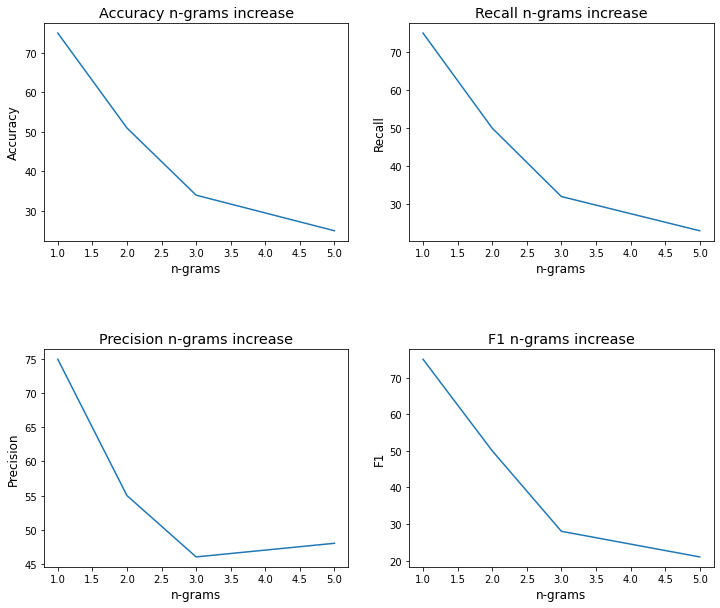

In [41]:
#print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=0.5)

plt.show

In [50]:
accuracy_ngrams = []
recall_ngrams = []
precion_ngrams = []
f1_ngrams = []

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
def naivebayesTFIDF():
    #training and testing feature vectors
    
    for n in [1,2,3,5]:
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        tfidf = TfidfVectorizer(stop_words='english',ngram_range = (n,n), analyzer='word', use_idf=True)#tokenizer = token.tokenize)
        text_count2 = tfidf.fit_transform(df['final_cleaned_tweets'])

        X_train, X_test, Y_train, Y_test = train_test_split(text_count2, df['sentiment_nlpfinal'], test_size=0.25, random_state=5)

        MNB = MultinomialNB()
        MNB.fit(X_train, Y_train)
        
        predicted = MNB.predict(X_test)
        
        accuracy_score = (metrics.accuracy_score(Y_test,predicted))
        accuracy_score = (round(accuracy_score,2))*100
        accuracy_ngrams.append(accuracy_score)

        precision = (metrics.precision_score(Y_test, predicted, average='macro'))
        precision = (round(precision,2))*100
        precion_ngrams.append(precision)

        recall = (metrics.recall_score(Y_test, predicted, average='macro'))
        recall = (round(recall,2))*100
        recall_ngrams.append(recall)

        f1 = (metrics.f1_score(Y_test, predicted, average='macro'))
        f1 = (round(f1,2))*100
        f1_ngrams.append(f1)

        #print("\n\nConfusion Matrix for k = {} is:\n".format(k))
        #print(confusion_mat)
        #print("\nClassification Report for k = {} is:\n".format(k))
        #print(class_report)
        print("Accuracy Score for ngrams = {0} is: {1}%".format(n,accuracy_score))
        print("Recall for ngrams = {0} is: {1}%".format(n,recall))
        print("Precision for ngrams = {0} is: {1}%".format(n,precision))
        print("F1-score for ngrams = {0} is: {1}%".format(n,f1))

In [52]:
naivebayesTFIDF()

Accuracy Score for ngrams = 1 is: 75.0%
Recall for ngrams = 1 is: 72.0%
Precision for ngrams = 1 is: 78.0%
F1-score for ngrams = 1 is: 74.0%
Accuracy Score for ngrams = 2 is: 51.0%
Recall for ngrams = 2 is: 47.0%
Precision for ngrams = 2 is: 60.0%
F1-score for ngrams = 2 is: 44.0%
Accuracy Score for ngrams = 3 is: 32.0%
Recall for ngrams = 3 is: 28.999999999999996%
Precision for ngrams = 3 is: 52.0%
F1-score for ngrams = 3 is: 26.0%
Accuracy Score for ngrams = 5 is: 26.0%
Recall for ngrams = 5 is: 23.0%
Precision for ngrams = 5 is: 48.0%
F1-score for ngrams = 5 is: 20.0%


<function matplotlib.pyplot.show(close=None, block=None)>

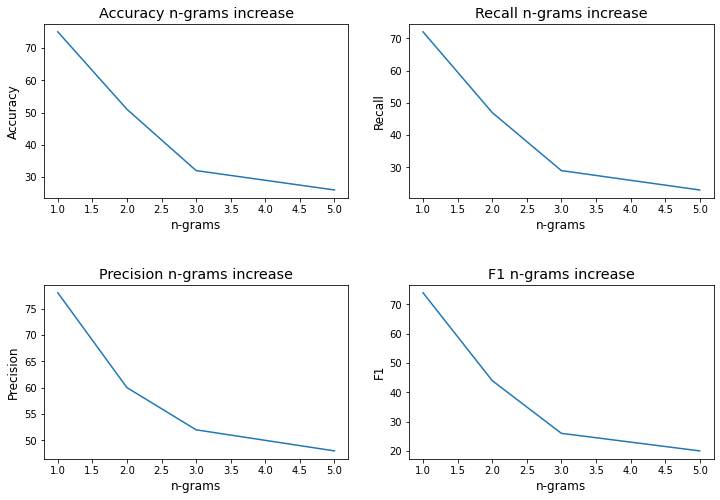

In [53]:
#print(accuracy_ngrams)
ngrams = [1,2,3,5] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(ngrams, accuracy_ngrams)
plt.title("Accuracy n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(ngrams,recall_ngrams)
plt.title("Recall n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(ngrams,precion_ngrams)
plt.title("Precision n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(ngrams,f1_ngrams)
plt.title("F1 n-grams increase",fontsize='x-large')
plt.xlabel("n-grams",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show